In [1]:
# 引入Python包，在jupyter notebook 运行后可以直接输出多个变量 注意大小写
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# 指定gpu设备
import os
os.environ['CUDA_VISIBLE_DEVICES'] ="0" # gpu
# os.environ["CUDA_VISIBLE_DEVICES"] = "-1" # cpu

In [2]:
from keras.applications import VGG16

Using TensorFlow backend.


In [3]:
vgg16_model = VGG16(weights='imagenet')

In [4]:
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [5]:
import matplotlib.pyplot as plt
def plt_show_img(img):
    plt.clf()
    plt.figure()
    plt.imshow(img)
    plt.show()

<Figure size 432x288 with 0 Axes>

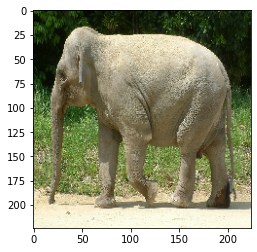

(1, 224, 224, 3)

1000

385

In [6]:
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
import numpy as np

img_path = 'elephant.jpg'
img = image.load_img(img_path, target_size=(224, 224))
plt_show_img(img)
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
x.shape
result = vgg16_model.predict(x)
len(result[0])
np.argmax(result[0])